In [7]:
#-*-coding:utf-8-*-\
import os
import random # Analysis
import datetime as dt # Analysis
import numpy as np # Analysis
import pandas as pd # Analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') # ignore warnings

# datafarme 보여주는 범위 설정

pd.options.display.max_columns=1000
pd.options.display.max_rows=200
pd.options.display.float_format = '{:.5f}'.format

plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [183]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_"+ str(i) + ".csv")

In [199]:
year = 2014
male_inter_marriage = df[year][(df[year]['남편국적구분코드'] == 1 )& (df[year]['아내국적구분코드'] >= 2)]

In [200]:
male_inter_marriage['아내국적코드'] = male_inter_marriage['아내국적코드'].astype(str)

In [201]:
male_inter_marriage['아내국적코드'].unique()

array(['1931', '1151', '1944', '2451', '1122', '1342', '1313', '3036',
       '3010', '1164', '****', '1119', '6017', '8015', '2011', '2325',
       '1245', '1928', '1177', '2244', '3515', '2435', '4064', '5254',
       '2095', '2228', '1229', '1436', '9070', '7126', '1326', '2037',
       '1232', '6020', '4077', '2927', '2024', '1135', '4093', '5610',
       '2448', '4514', '***', '2943', '2257', '2969', '2299', '1410',
       '4022', '2040', '5021', '2312', '1452', '4051', '1122.0', '1931.0',
       '1151.0', '6017.0', '1944.0', '1119.0', '1164.0', '3036.0',
       '1928.0', '1313.0', '1245.0', '1177.0', '2451.0', '1342.0',
       '1436.0', '2435.0', '2244.0'], dtype=object)

In [202]:
to_drop_condition = (male_inter_marriage['아내국적코드'] == '***') | (male_inter_marriage['아내국적코드'] == '****')

male_inter_marriage.drop(labels=male_inter_marriage[to_drop_condition].index, inplace=True)

In [203]:
age_40_group = {
    '필리핀' : '1122',
    '베트남' : '1151',
    '캄보디아' : '1164',
    '인도네시아' : '1245',
    '네팔' : '1342',
    '몽골' : '1928',
    '우즈베키스탄' : '2451',
    '키르키스스탄' : '7126',
    '태국' : '1313',
}

In [204]:
age_30_group = {
    '대만' : '1119',
    '일본' : '1944',
    '캐나다' : '3010',
    '미국' : '3036',
    '호주' : '6017',
    '뉴질랜드' : '6020',
    '러시아' : '8015',
}

mixed_group = {
    '중국' : '1931',
}

In [205]:
low_age = []

In [206]:
male_inter_marriage

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
21,2014,11,25,31,31,2014,5,8,8,4,4,1,3,32.34700,33.98300,1.00000,NaN,2.00000,1931
78,2014,11,12,33,81,2014,11,7,13,5,4,1,1,33.89800,20.38600,1.00000,NaN,3.00000,1151
109,2014,11,24,24,81,2014,11,13,13,5,5,1,1,33.99700,31.32300,1.00000,NaN,3.00000,1944
120,2014,11,12,39,39,2014,11,1,13,4,5,3,3,44.60500,32.14500,1.00000,NaN,3.00000,2451
128,2014,12,29,11,81,2014,12,5,5,4,4,3,3,58.77800,49.82400,1.00000,NaN,3.00000,1931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300657,2014,6,17,38,81,2014,6,13,13,3,3,3,2,66.68400,45.12000,1.00000,NaN,3.00000,1931.0
300690,2014,6,18,11,11,2014,6,2,13,5,4,1,1,31.82400,27.86800,1.00000,NaN,3.00000,1931.0
300696,2014,7,28,39,81,2014,4,2,13,4,4,1,1,42.05400,20.32800,1.00000,NaN,3.00000,1151.0
300703,2014,6,19,36,81,2014,2,9,13,3,5,1,1,43.48400,31.19100,1.00000,NaN,3.00000,1313.0


In [207]:
age_30_df = male_inter_marriage[male_inter_marriage['아내국적코드'].isin(list(age_30_group.values()))]

age_40_df = male_inter_marriage[male_inter_marriage['아내국적코드'].isin(list(age_40_group.values()))]

age_mixed = male_inter_marriage[male_inter_marriage['아내국적코드'].isin(list(mixed_group.values()))]

china_under_35 = male_inter_marriage[(male_inter_marriage['아내국적코드'].isin(list(mixed_group.values()))) & (male_inter_marriage['아내연령'] <= 35)]

china_upper_35 = male_inter_marriage[(male_inter_marriage['아내국적코드'].isin(list(mixed_group.values()))) & (male_inter_marriage['아내연령'] > 35)]

age_30_df = pd.concat([age_30_df, china_under_35])

age_30_df = age_30_df[age_30_df['남편결혼코드'] == 1]

age_40_df = pd.concat([age_40_df, china_upper_35])

age_40_df = age_40_df[age_40_df['남편결혼코드'] == 1]

age_40_df['아내국적코드'].value_counts()

1151    3191
1122     758
1931     684
1164     379
1313     309
2451     152
1342      79
1245      79
1928      66
7126      18
Name: 아내국적코드, dtype: int64

In [208]:
print(len(age_30_df))

print(len(age_40_df))

print(len(age_mixed))

4488
5715
5191


In [209]:
age_40_df

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
78,2014,11,12,33,81,2014,11,7,13,5,4,1,1,33.89800,20.38600,1.00000,NaN,3.00000,1151
153,2014,11,24,24,81,2014,11,9,13,4,4,1,1,37.55600,20.89500,1.00000,NaN,3.00000,1151
180,2014,11,12,33,81,2014,11,9,13,5,4,1,1,42.07600,19.30900,1.00000,NaN,3.00000,1151
181,2014,12,29,26,81,2014,12,8,13,4,4,1,1,43.97200,29.99100,1.00000,NaN,3.00000,1151
248,2014,12,30,26,81,2014,12,3,6,5,4,1,1,44.35000,20.33400,1.00000,NaN,3.00000,1151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292514,2014,8,1,31,81,2014,8,5,13,4,4,1,3,32.81000,38.55000,1.00000,NaN,3.00000,1931
292618,2014,8,1,31,81,2014,7,7,99,3,4,1,3,46.75600,48.31200,1.00000,NaN,3.00000,1931
292927,2014,6,20,31,81,2014,6,3,5,5,5,1,3,38.61600,46.76700,1.00000,NaN,3.00000,1931
292929,2014,6,20,31,81,2014,6,1,13,4,4,1,2,37.20000,43.97500,1.00000,NaN,3.00000,1931


<AxesSubplot:xlabel='남편연령', ylabel='Density'>

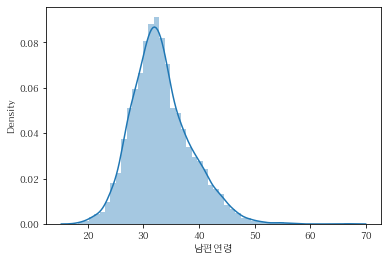

In [210]:
sns.distplot(age_30_df['남편연령'])

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

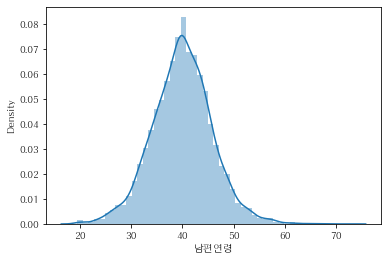

In [211]:
sns.distplot(age_40_df['남편연령'])

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

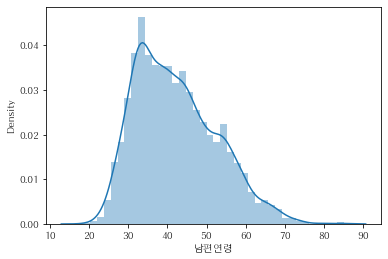

In [212]:
sns.distplot(age_mixed['남편연령'])

-----------------------------------------------------------------------------

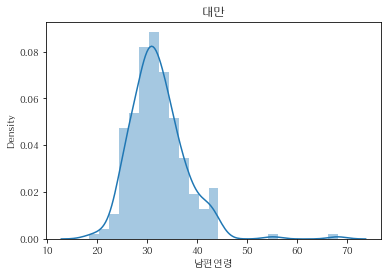

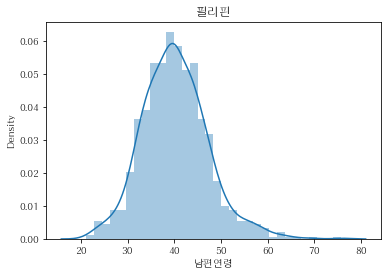

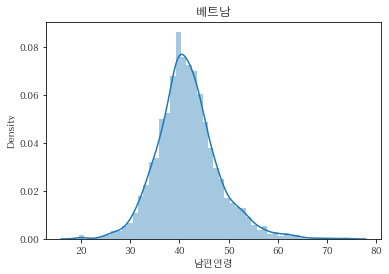

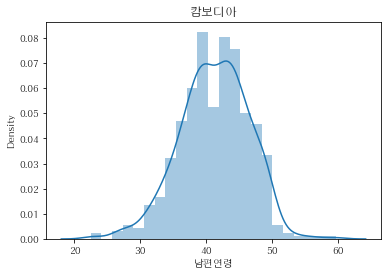

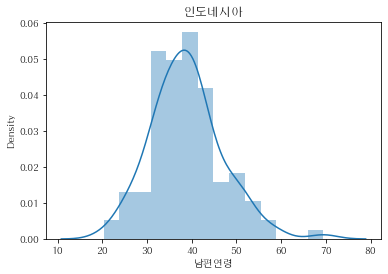

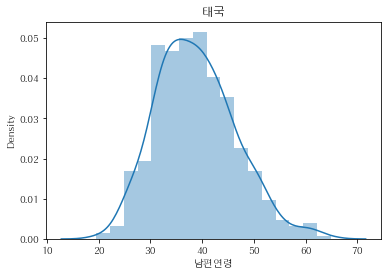

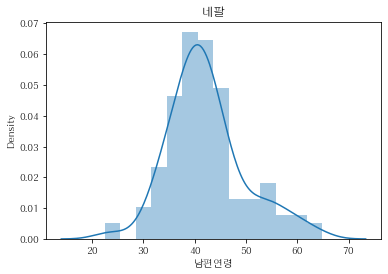

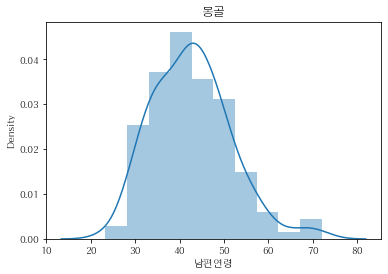

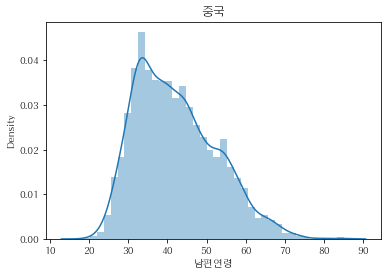

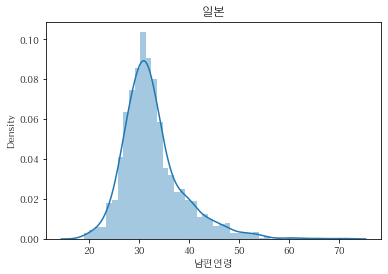

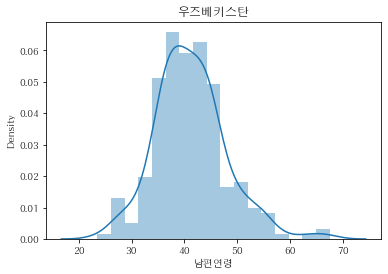

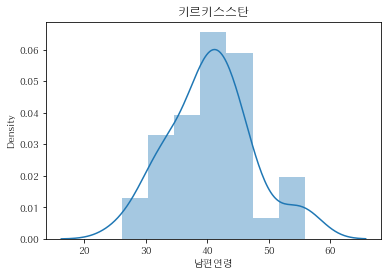

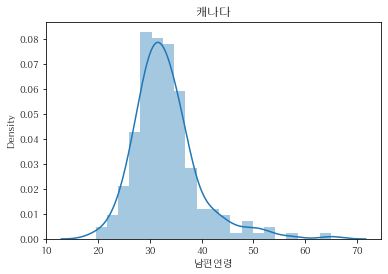

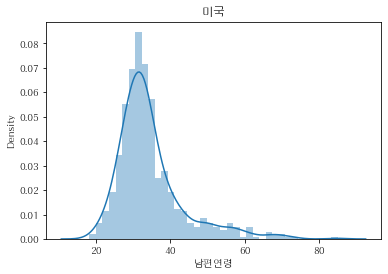

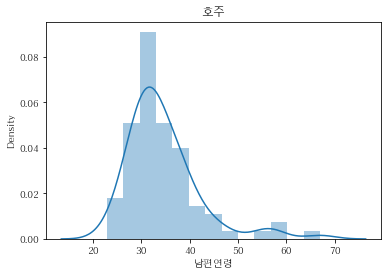

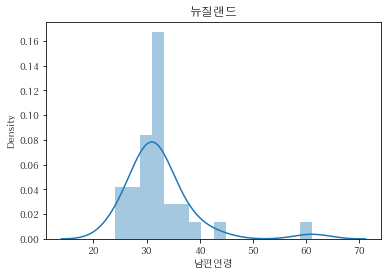

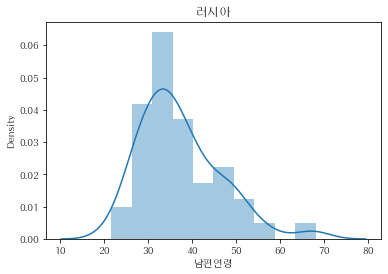

In [213]:
for name, code in international_codes.items():
    plt.figure()
    plt.title(name)
    sns.distplot(male_inter_marriage[male_inter_marriage['아내국적코드'] == str(code)]['남편연령']) 